Mt. Oliver Neighborhood         2
Outside County                  4
Troy Hill-Herrs Island          5
Outside State                   6
Mt. Oliver Boro                 7
                             ... 
Homewood South               1552
East Allegheny               1653
Carrick                      1676
South Side Flats             2517
Central Business District    2879
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


Text(0, 0.5, 'Arrests')

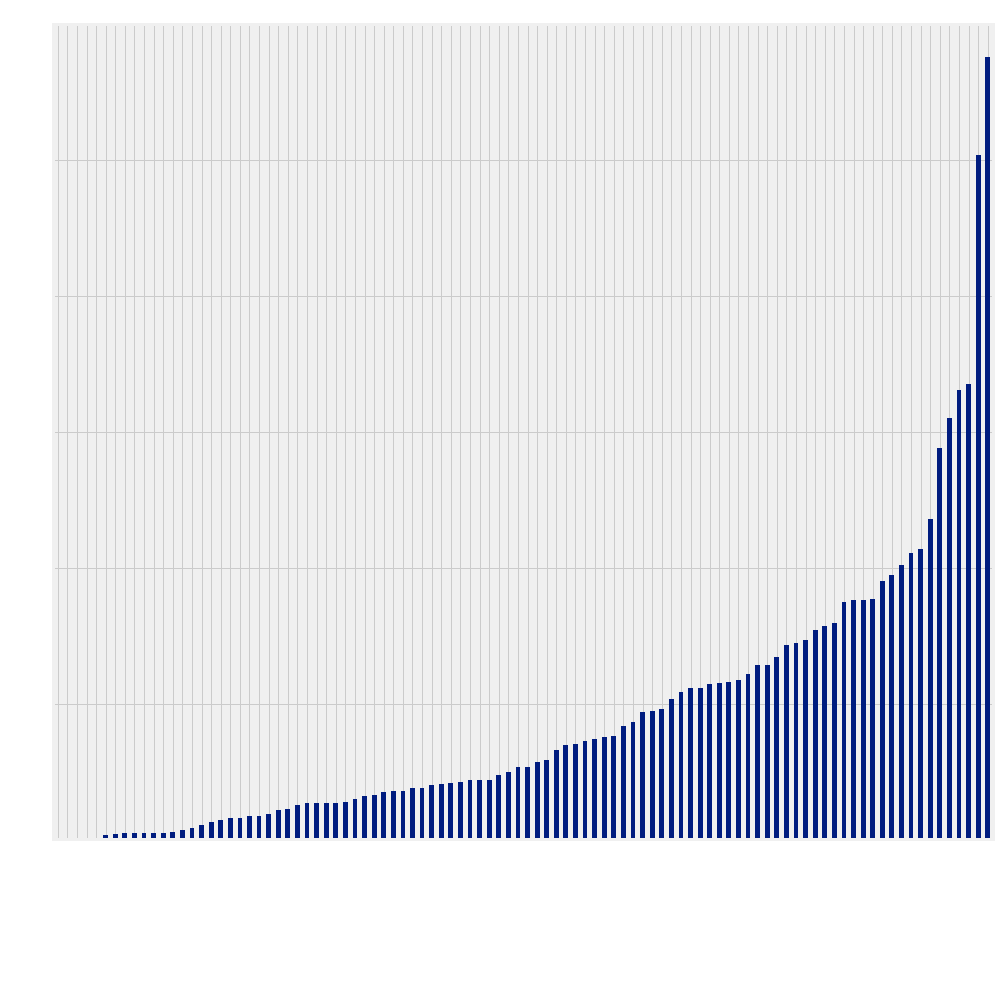

In [9]:
import csv

import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col = "PK")

data = data.dropna()


data_plot = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

print(data_plot)

#Bar Graph
plt.style.use('seaborn-dark-palette')
data_plot.plot.bar(figsize=(15,15), ylim=[0,3000])
plt.title("Arrests per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Arrests")

        


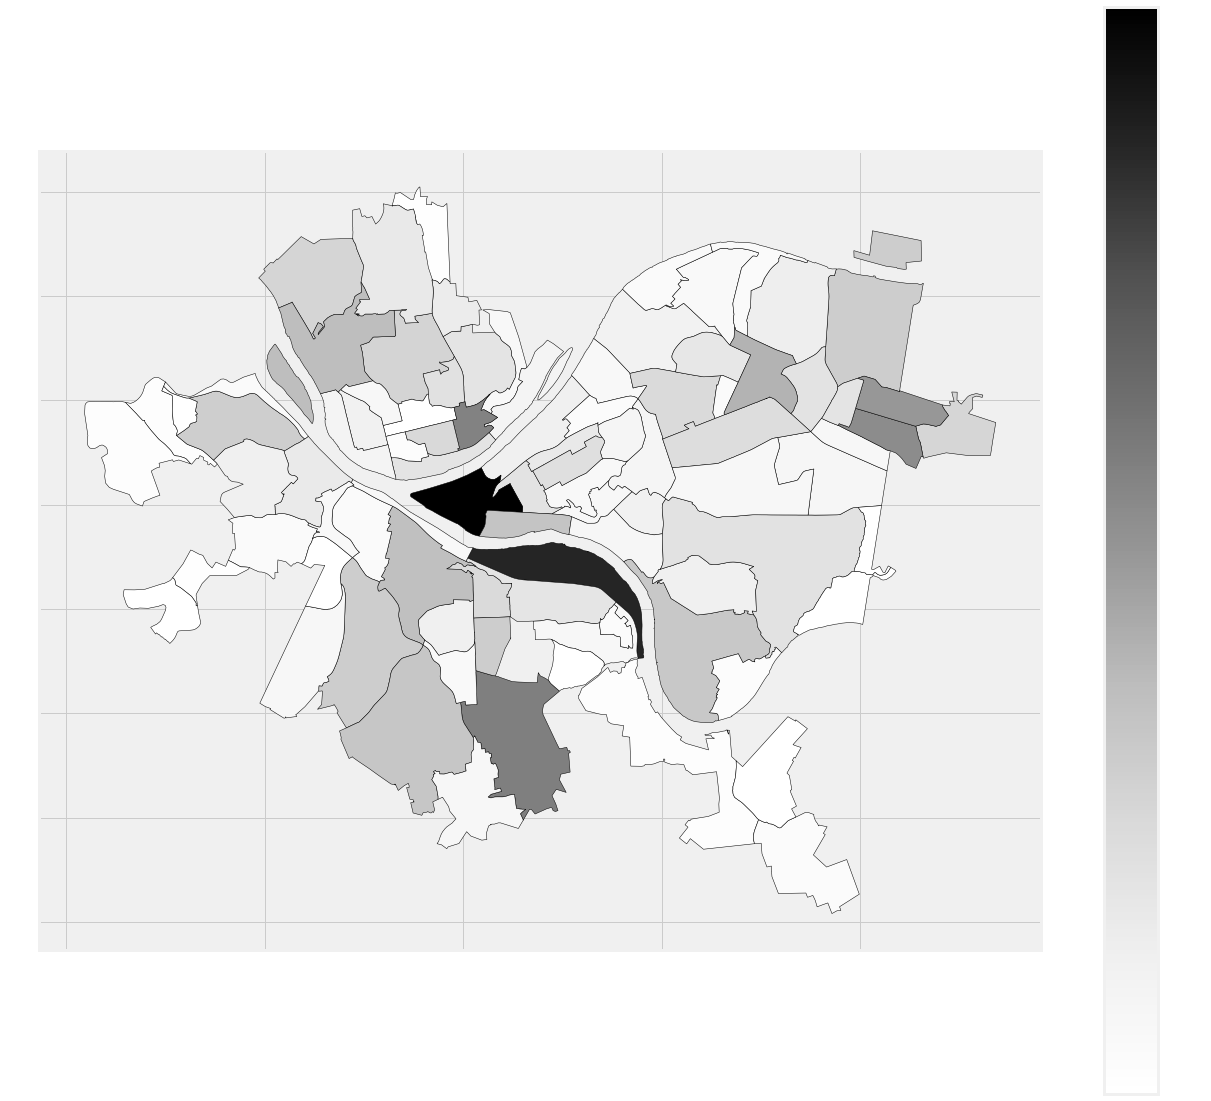

In [22]:
count = 1
data["number_of_arrests"] = count
arrests = data.groupby("INCIDENTNEIGHBORHOOD").sum()["number_of_arrests"]
arrests.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
arrest_map = neighborhoods.merge(arrests, how='left', left_on='hood',right_on='INCIDENTNEIGHBORHOOD')
arrest_map.plot(column='number_of_arrests', cmap='Greys', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Arrests"}, figsize=(20,20))

#### Data Limitations

One of the largest limitations of this data has to do with the population of each neighborhood. Some neighborhoods are going to have higher populations compared to other ones, so it might make sense for one neighborhood to have a higher numbers of arrests.

#### Data Analysis

Since our group is using neighborhood saftey as the metric to determine the best neighborhood, we thought that the number of arrests would be a great indicator of saftey since it is pretty much a direct correlation to the amount of crime. Based on the data from this data set, the neighborhood with the least amount of arrrests is Mt. Oliver and the one with the most is the Central Buisness District. Therefore, based on arrests, Mt. Oliver would be the saftest neighborhood. However there are a few other neighborhoods with a very similar low amount of arrests including Outside County, Troy Hill-Herrs Island, Outside State, and Mt. Oliver Boro